In [29]:
!pip install tensorflow opencv-python seaborn scikit-learn matplotlib

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [30]:
!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

DATA_DIR = "./Sign-Language-Digits-Dataset/Dataset"
print("Dataset folder:", DATA_DIR)
print("Classes available:", os.listdir(DATA_DIR))


Cloning into 'Sign-Language-Digits-Dataset'...
remote: Enumerating objects: 2095, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2095 (delta 2), reused 0 (delta 0), pack-reused 2089 (from 1)
Receiving objects: 100% (2095/2095), 15.07 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (660/660), done.
Dataset folder: ./Sign-Language-Digits-Dataset/Dataset
Classes available: ['0', '1', '5', '3', '6', '2', '8', '7', '9', '4']


In [31]:
IMG_SIZE = 64
images, labels = [], []
classes = os.listdir(DATA_DIR)

for idx, gesture in enumerate(classes):
    gesture_path = os.path.join(DATA_DIR, gesture)
    for file in os.listdir(gesture_path):
        img_path = os.path.join(gesture_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(idx)

# Convert to arrays
X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype('float32') / 255.0
y = to_categorical(np.array(labels), num_classes=len(classes))

print("✅ Dataset loaded:", X.shape, y.shape)
print("Classes:", classes)


✅ Dataset loaded: (2062, 64, 64, 1) (2062, 10)
Classes: ['0', '1', '5', '3', '6', '2', '8', '7', '9', '4']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (1649, 64, 64, 1) (1649, 10)
Test: (413, 64, 64, 1) (413, 10)


In [33]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,146 (4.86 MB)

 Trainable params: 1,275,146 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=32,
    verbose=1
)


Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.0977 - loss: 2.3146 - val_accuracy: 0.1758 - val_loss: 2.2839
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.2894 - loss: 2.0585 - val_accuracy: 0.7515 - val_loss: 1.0374
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - accuracy: 0.6393 - loss: 1.0176 - val_accuracy: 0.7939 - val_loss: 0.6260
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.7774 - loss: 0.6958 - val_accuracy: 0.8606 - val_loss: 0.4579
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - accuracy: 0.8546 - loss: 0.4763 - val_accuracy: 0.9091 - val_loss: 0.3582
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.8723 - loss: 0.4077 - val_accuracy: 0.9273 - val_loss: 0.2792
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.9009 - loss: 0.3105 - val_accuracy: 0.9273 - val_loss: 0.2848
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - accuracy: 0.9309 - loss: 0.2067 - val_accu

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Final Test Accuracy: {test_acc*100:.2f}%")



🎯 Final Test Accuracy: 95.88%


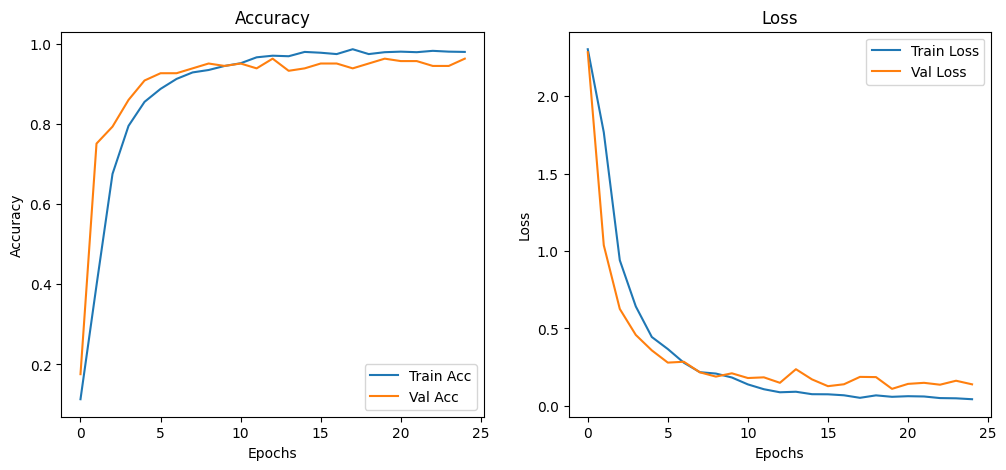

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy"); plt.xlabel("Epochs"); plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss"); plt.xlabel("Epochs"); plt.ylabel("Loss")

plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


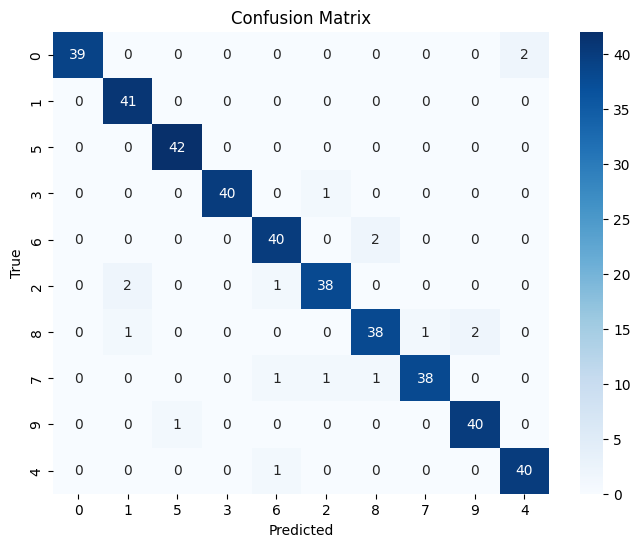

In [37]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()


In [38]:
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=classes))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.93      1.00      0.96        41
           5       0.98      1.00      0.99        42
           3       1.00      0.98      0.99        41
           6       0.93      0.95      0.94        42
           2       0.95      0.93      0.94        41
           8       0.93      0.90      0.92        42
           7       0.97      0.93      0.95        41
           9       0.95      0.98      0.96        41
           4       0.95      0.98      0.96        41

    accuracy                           0.96       413
   macro avg       0.96      0.96      0.96       413
weighted avg       0.96      0.96      0.96       413



In [39]:
model.save("hand_gesture_model.keras")


In [40]:
from tensorflow.keras.models import load_model
model2 = load_model("hand_gesture_model.keras")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!
